In [6]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
pd.set_option('display.max_columns', 50)

In [7]:
dfi = pd.read_csv("Data/superhero_info - superhero_info.csv")
dfi.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [26]:
dfp = pd.read_csv("Data/superhero_powers - superhero_powers.csv")
dfp.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [9]:
# We need to split Hero|Publisher into separate columns
dfi[['Hero','Publisher']] = dfi['Hero|Publisher'].str.split('|', expand=True)
dfi.head(3)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics


In [10]:
dfi = dfi.drop(columns="Hero|Publisher")
dfi.columns

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Measurements', 'Hero', 'Publisher'],
      dtype='object')

In [12]:
## we need to see detailed row of Measurements before we can read in JSON and break up
mnts = dfi.loc[0,"Measurements"]
print(type(mnts))
mnts

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [13]:
# Need to replace single marks with double quotes to read in JSON
mnts = mnts.replace("'",'"')
mnts

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [14]:
## now we can use json.loads
fixed_mnts = json.loads(mnts)
print(type(fixed_mnts))
fixed_mnts

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [16]:
# Replacing entire column
dfi['Measurements'] = dfi['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
dfi['Measurements'] = dfi['Measurements'].apply(json.loads)
dfi['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [18]:
hw = dfi['Measurements'].apply(pd.Series)
hw

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [19]:
# concat long_lat with original dataframe
dfi = pd.concat((dfi, hw), axis = 1)
dfi.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [20]:
dfi = dfi.drop(columns = 'Measurements')
dfi.head(1)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg


In [21]:
reorder = ['Hero', 'Publisher', 'Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color', 'Height', 'Weight']

In [22]:
dfi = dfi.reindex(columns = reorder)
dfi.head(1)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg


In [28]:
dfp.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [29]:
sample = dfp.loc[0, "Powers"]
sample

'Agility,Super Strength,Stamina,Super Speed'

In [35]:
# We need to bracket all strings in Powers, not expanding!
dfp['power_split'] = dfp['Powers'].str.split(',')
dfp['power_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: power_split, dtype: object

In [36]:
# Attempting to read Powers with JSON
exploded = dfp.explode("power_split")
exploded.head()

,hero_names,Powers,power_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [37]:
new_cols = exploded['power_split'].dropna().unique()
new_cols

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [39]:
for col in new_cols:
    dfp[col] = dfp['Powers'].str.contains(col).copy() # include copy to prevent warning
dfp.head()

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_28188\1869407315.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfp[col] = dfp['Powers'].str.contains(col).copy() # include copy to prevent warning
C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_28188\1869407315.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfp[col] = dfp['Powers'].str.contains(col).copy() # include copy to prevent warning
C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_28188\1869407315.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is 

,hero_names,Powers,power_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,...,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Now we will combine dataframes to display in unison

In [40]:
dfp = dfp.drop (columns = ["Powers", "power_split"])
dfp.head(1)

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,...,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
merged = pd.merge(dfi, dfp, left_on = "Hero", right_on = "hero_names")
merged.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,...,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg,A-Bomb,False,True,True,False,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg,Abe Sapien,True,True,True,False,True,True,True,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg,Abin Sur,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg,Abomination,False,True,True,True,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg,Absorbing Man,False,True,False,False,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
merged['Height'] = merged['Height'].replace(" cm","")
merged['Height'] = merged['Height'].astype(int)
merged['Height'].dtype

dtype('int32')

In [57]:
merged['Weight'] = merged['Weight'].str.replace(" kg","")

In [59]:
merged['Weight'] = merged['Weight'].astype(int)
merged['Weight'].dtype

dtype('int32')

In [60]:
# Compare the average weight of super powers who have Super Speed to those who do not.
merged.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

In [61]:
#2 What is the average height of heroes for each publisher?
merged.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.920290
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.545455
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

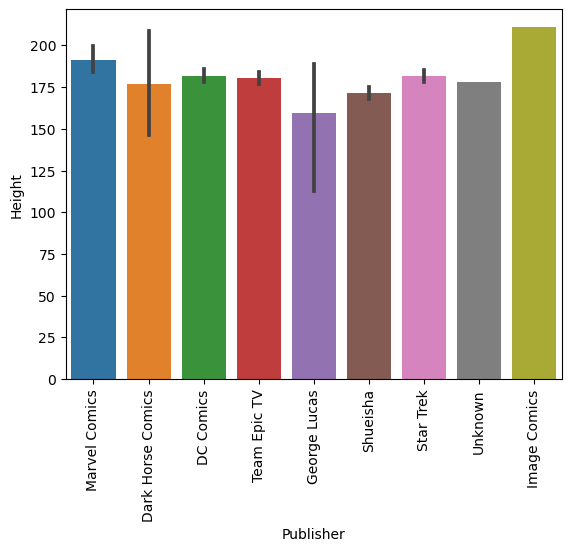

In [62]:
ax = sns.barplot(data=merged, x='Publisher',y='Height')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);